<img src='./imgs/pinguino2-export.png' width='300' align='right' style='filter: drop-shadow(10px 5px 10px #423f3b)'>

# Análisis bivariado
El análisis bivariado es una forma de analizar dos variables a la vez. Se utiliza para estudiar la relación entre dos variables y descubrir patrones y tendencias, o si hay alguna conexión entre ellas. Esto se logra mediante el uso de diversos métodos estadísticos, como la regresión y la correlación.
***

## Importar librerías y cargar datos

In [1]:
# Importar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.formula.api as smf

# Para ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# cargar datos
datos_procesados = pd.read_csv('./dataset/datos_procesados.csv')
datos_procesados.drop('Unnamed: 0', axis=1, inplace=True)
datos_procesados.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [3]:
# Crear el aspecto general de los gráficos
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6f69',
    'Gentoo': '#96ceb4',
    'Chinstrap': '#ffeead'
}

## Establecer relaciones: Gráfico de puntos

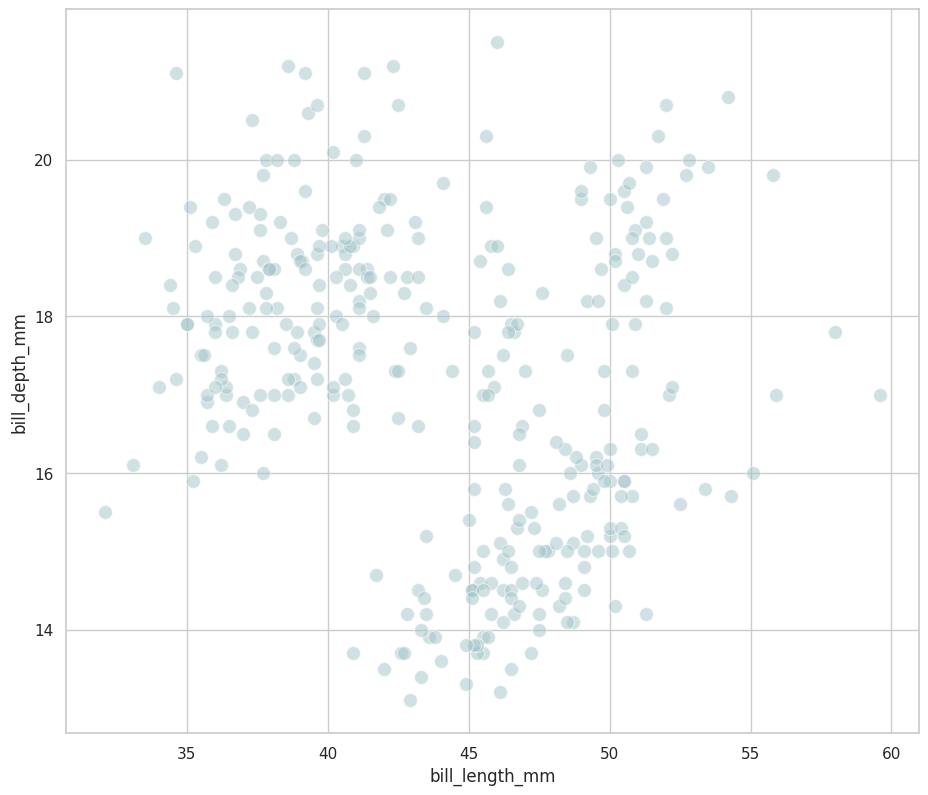

In [5]:
# Primer gráfico
sns.scatterplot(
    data = datos_procesados,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    color = '#A2C4C9',
    alpha = 1/2,
    s = 100
);

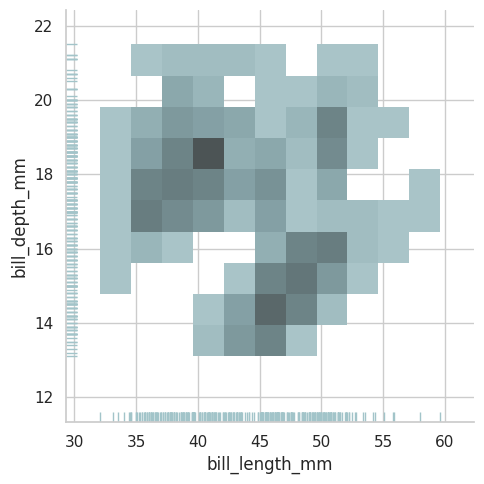

In [6]:
# Segundo gráfico 
# mismas variables que el primero
sns.displot(
    data = datos_procesados,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    color = '#A2C4C9',
    rug = True
);

El resultado es un histograma de frecuencias que muestra la interacción de dos variables. A diferencia del gráfico anterior, el histograma permite ver donde se encuentran los datos acumulados.

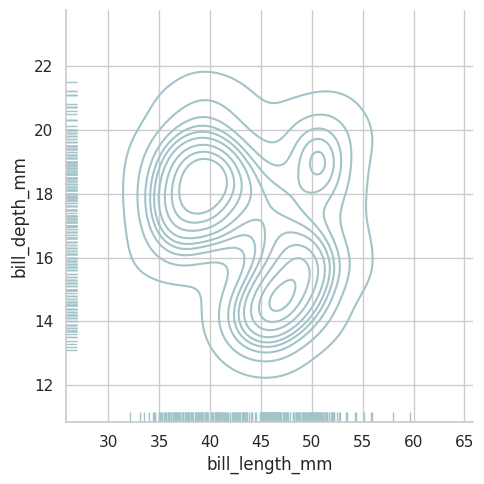

In [7]:
# Tercer gráfico
# mismas variables que los gráficos anteriores
sns.displot(
    data = datos_procesados,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    color = '#A2C4C9',
    rug = True,
    kind = 'kde'
);

Este gráfico permite ver las densidades.

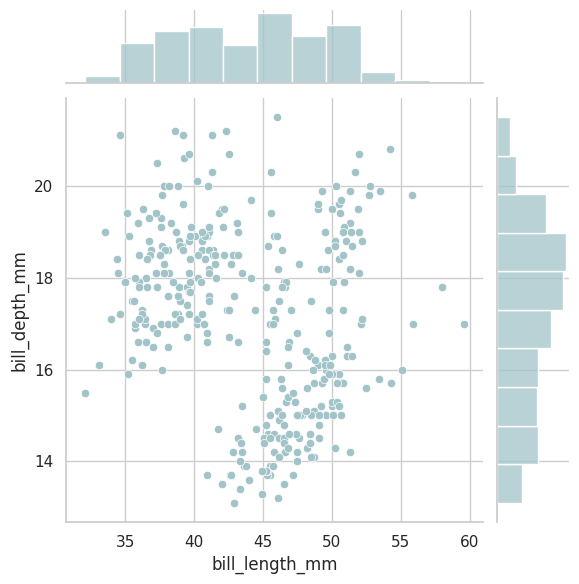

In [8]:
# Combinar múltiples gráficos
sns.jointplot(
    data = datos_procesados,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    color = '#A2C4C9'
);

## Establecer relaciones: Gráficos de violín y boxplots

Gráficos para explorar la relación entre una variable numérica y una variable categórica:

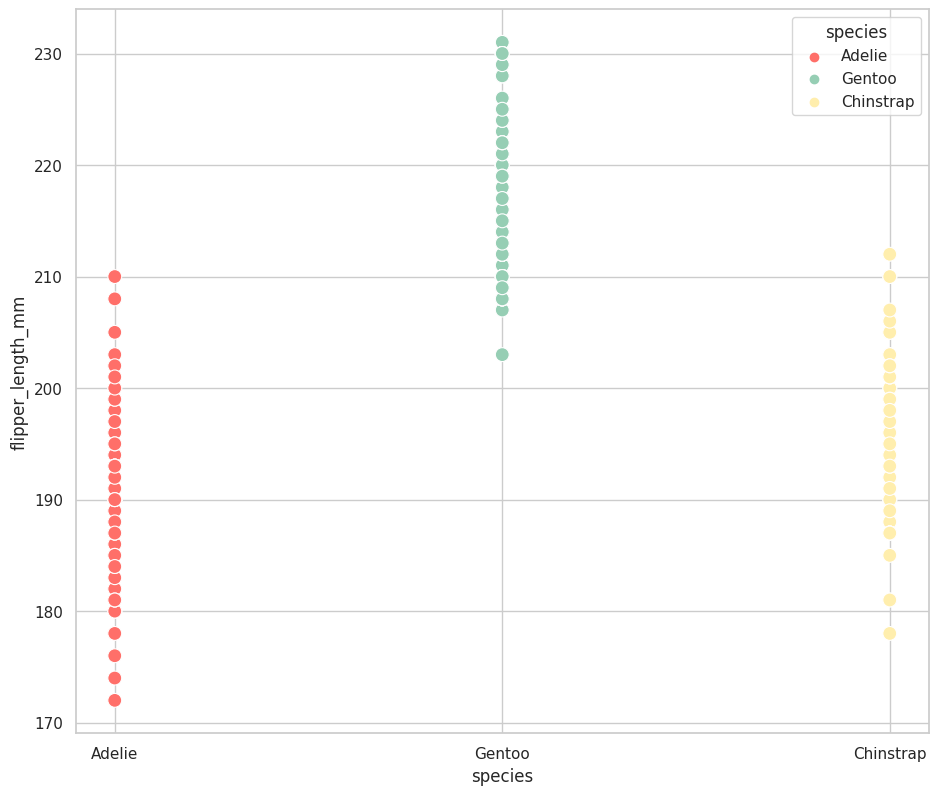

In [14]:
sns.scatterplot(
    data = datos_procesados,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color,
    s = 100
);

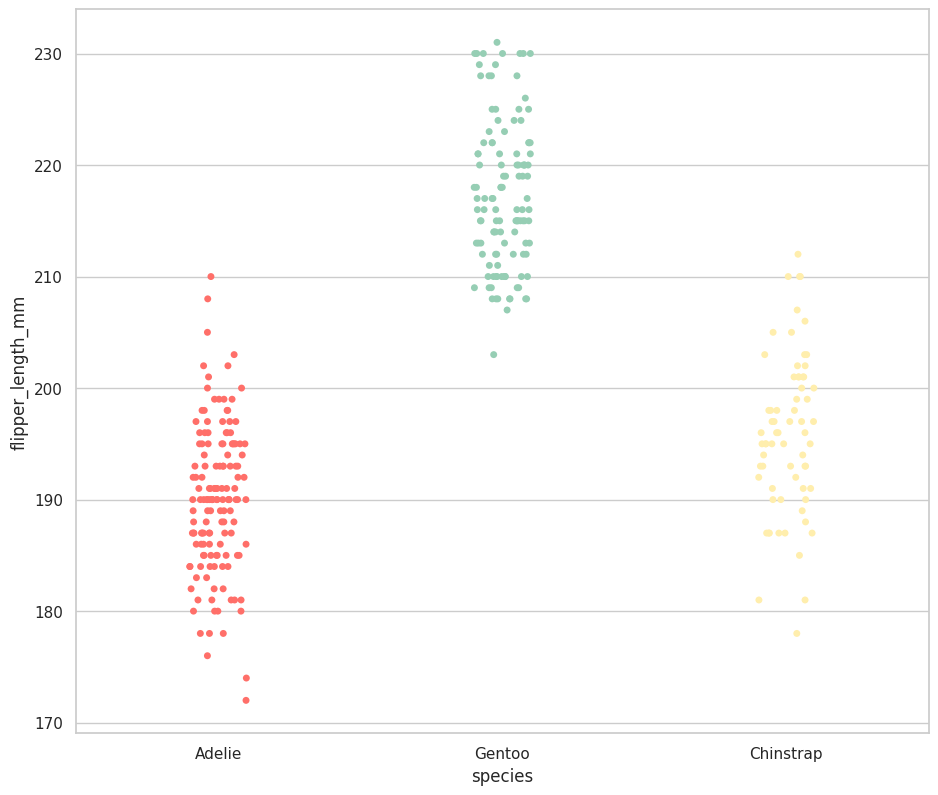

In [13]:
sns.stripplot(
    data = datos_procesados,
    x = 'species',
    y = 'flipper_length_mm',
    palette = penguin_color
);

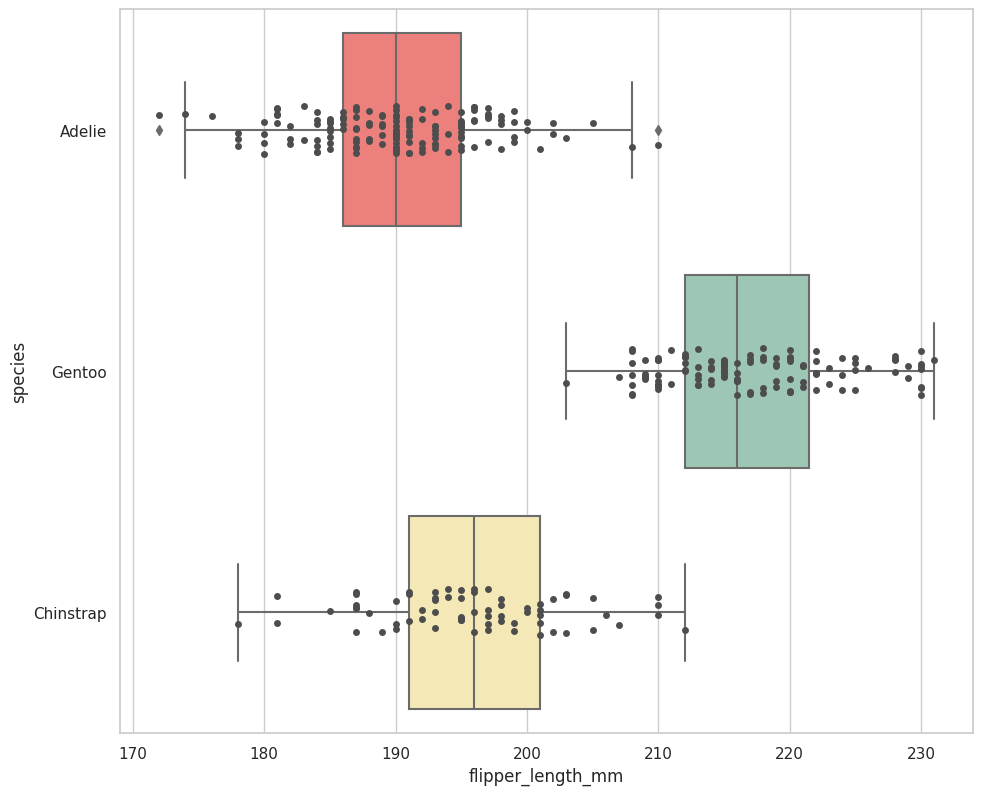

In [15]:
ax = sns.boxplot(
    data = datos_procesados,
    x = 'flipper_length_mm',
    y = 'species',
    palette = penguin_color
)

ax = sns.stripplot(
    data = datos_procesados,
    x = 'flipper_length_mm',
    y = 'species',
    color = '.3'
)

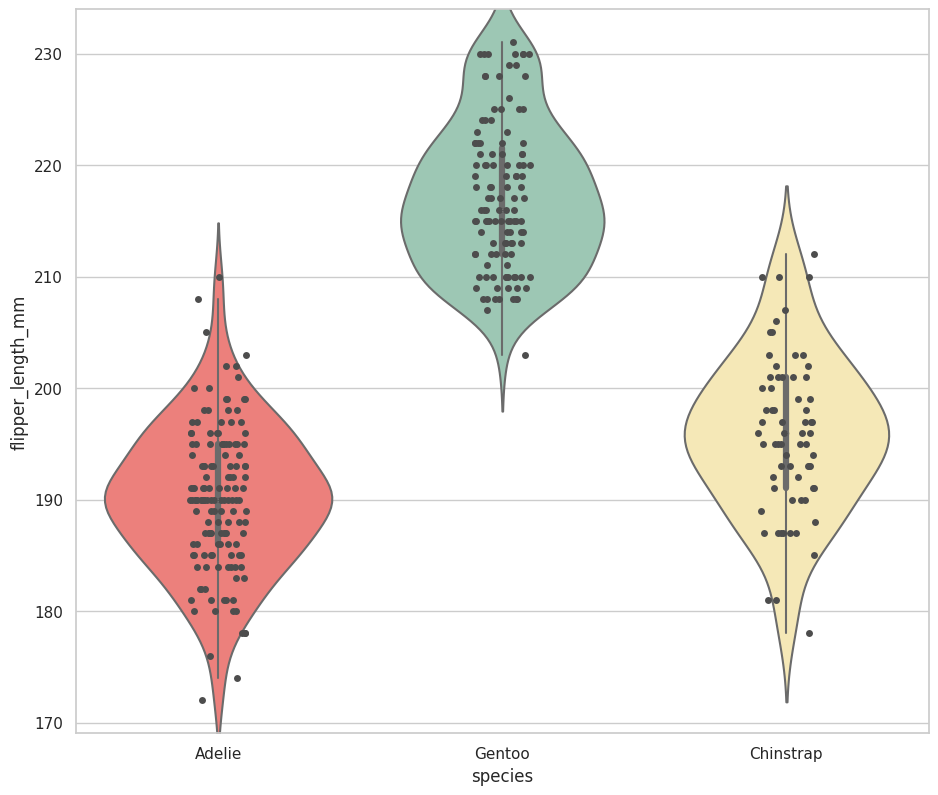

In [16]:
ax = sns.violinplot(
    data = datos_procesados,
    x = 'species',
    y = 'flipper_length_mm',
    palette = penguin_color
)

ax = sns.stripplot(
    data = datos_procesados,
    x = 'species',
    y = 'flipper_length_mm',
    color = '.3'
)

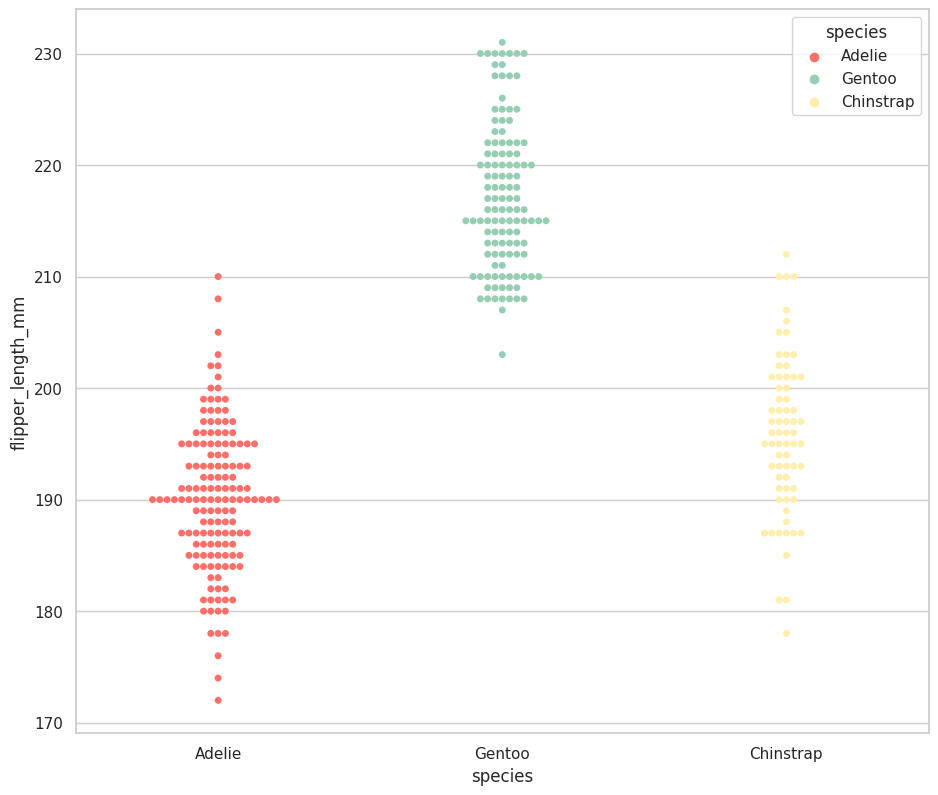

In [23]:
sns.swarmplot(
    data = datos_procesados,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color,
);

## Establecer relaciones: Matrices de correlación

Responder a las siguientes preguntas:

### ¿Existe una correlación lineal entre alguna de las variables?

In [24]:
datos_procesados.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


### ¿Cómo visualizar los coeficientes de correlación?

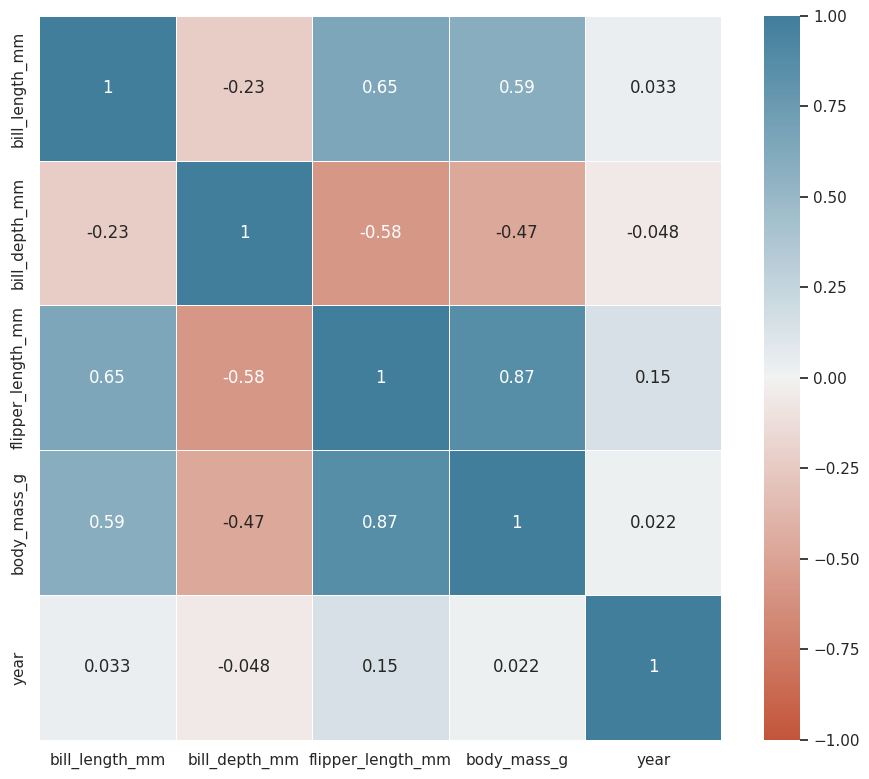

In [29]:
sns.heatmap(
    data = datos_procesados.corr(),
    cmap = sns.diverging_palette(20, 230, as_cmap=True),
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
);

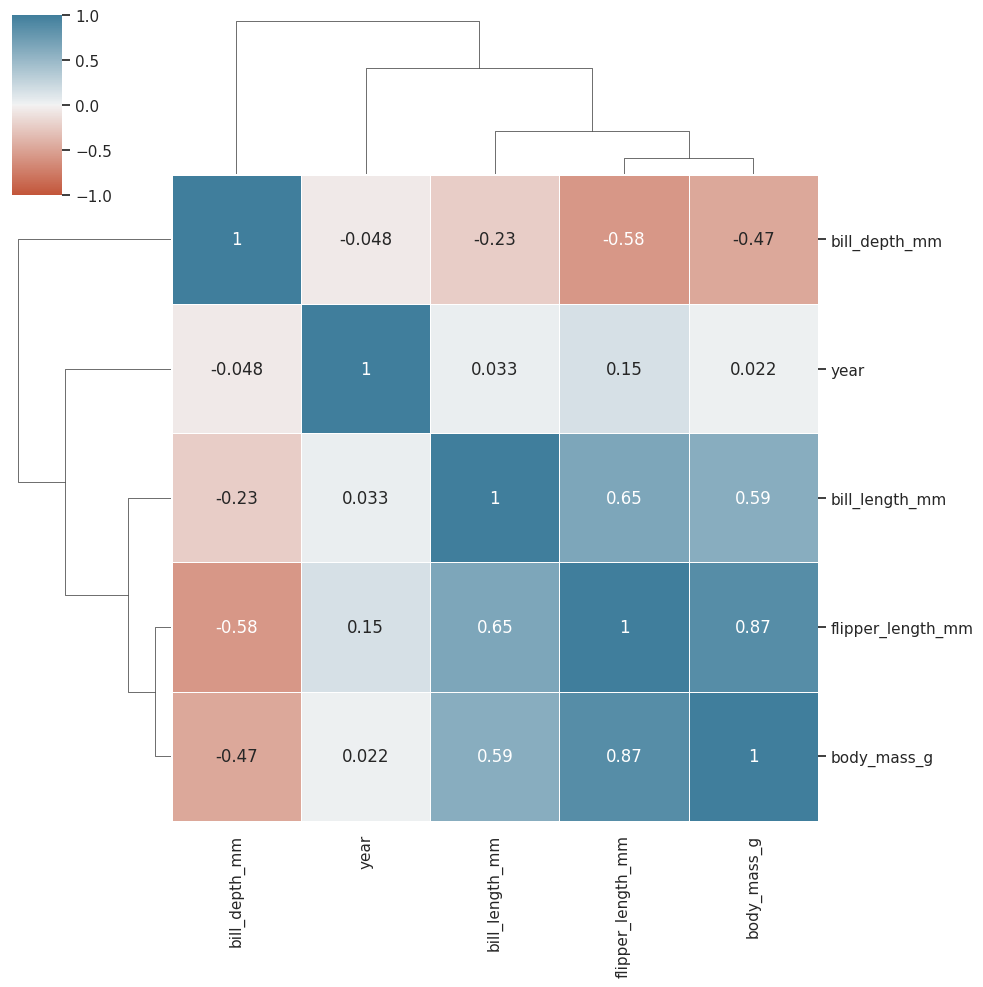

In [30]:
sns.clustermap(
    data = datos_procesados.corr(),
    cmap = sns.diverging_palette(20, 230, as_cmap=True),
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
);

### ¿Cómo representar una variable categórica como númerica discreta?

In [31]:
datos_procesados = (
    datos_procesados
    .assign(
        sex_num = lambda df: df.sex.replace(['female', 'male'], [0, 1])
    )
)

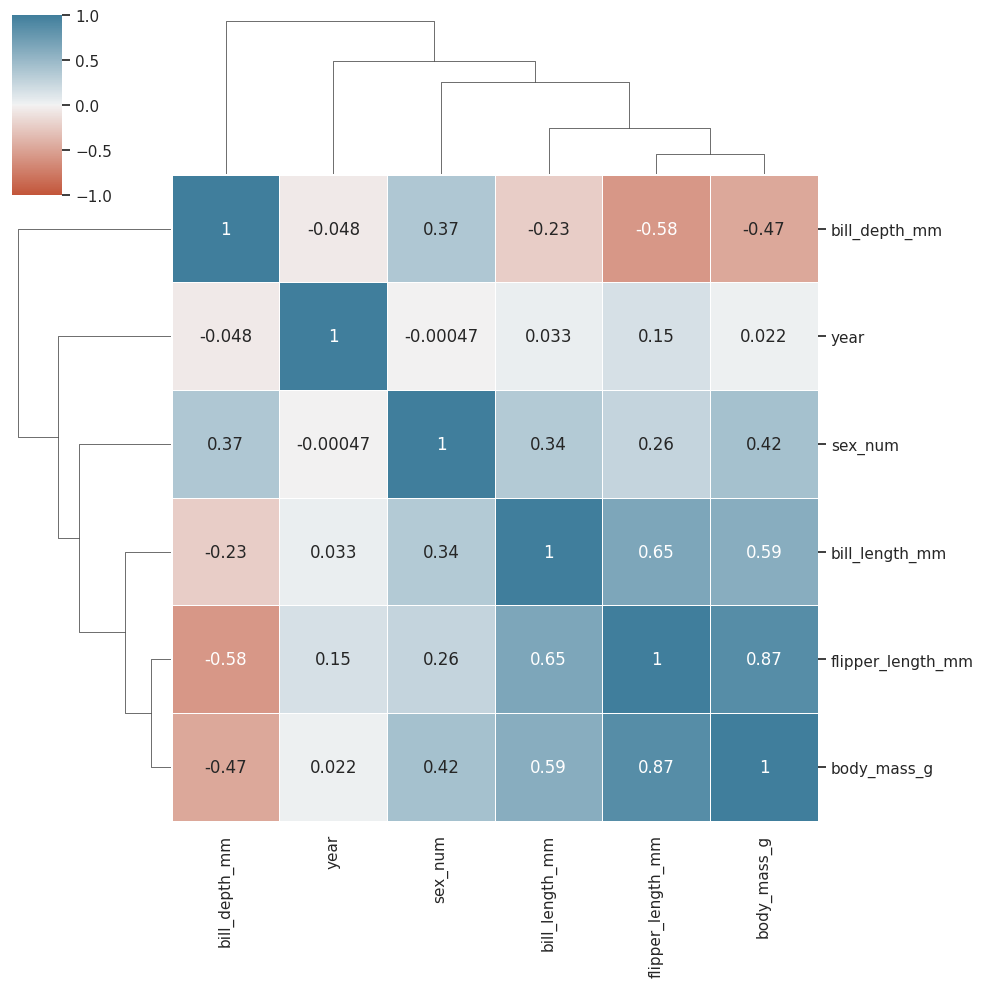

In [32]:
sns.clustermap(
    data = datos_procesados.corr(),
    cmap = sns.diverging_palette(20, 230, as_cmap=True),
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
);

### ¿Cuál es una limitante de los coeficientes de correlación lineal?

Un limitante ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

array([[1.        , 0.00677542],
       [0.00677542, 1.        ]])

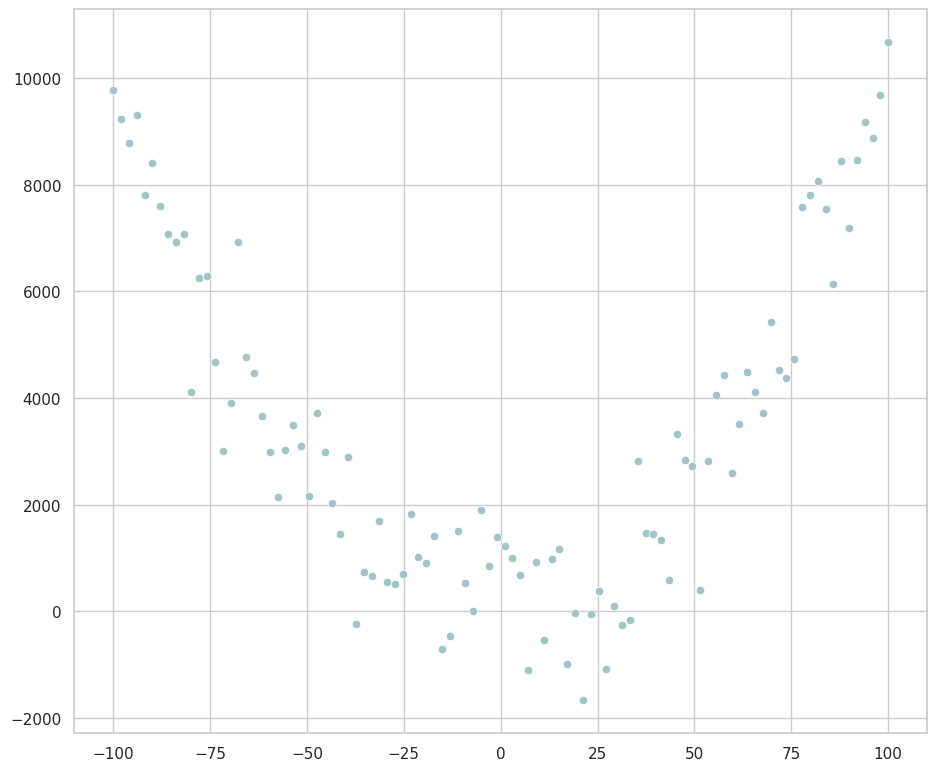

In [33]:
# Ej
x = np.linspace(-100, 100, 100)
y = x**2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x = x,
    y = y,
    color = '#A2C4C9'
);

np.corrcoef(x, y)

array([[1.        , 0.91662473],
       [0.91662473, 1.        ]])

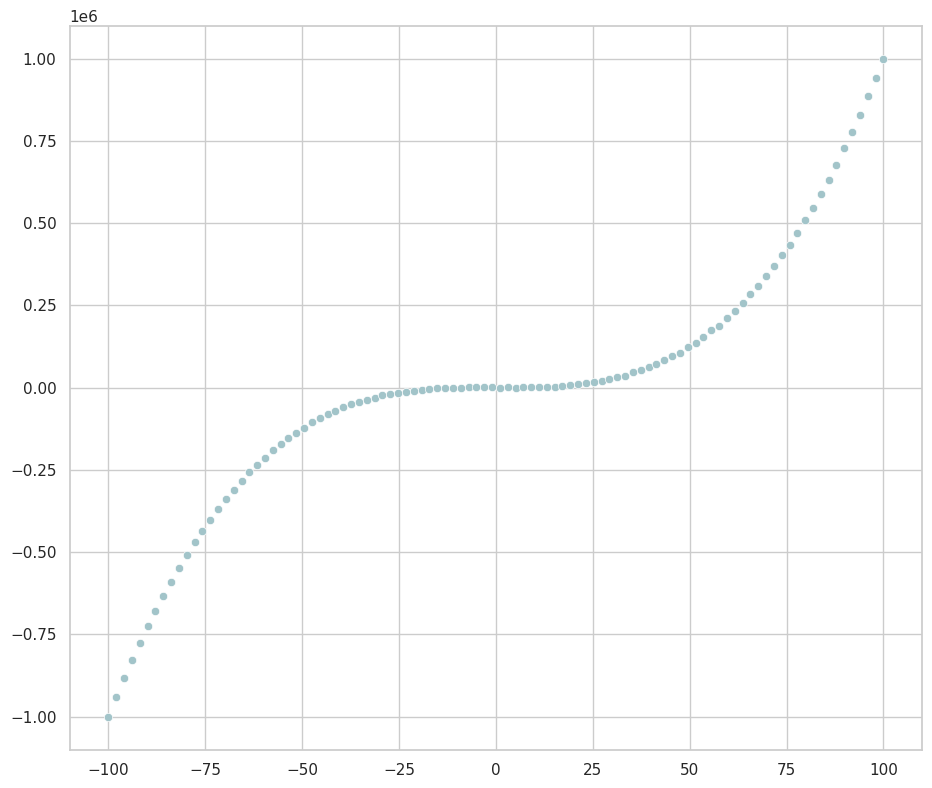

In [34]:
# Ej 2
x = np.linspace(-100, 100, 100)
y = x**3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x = x,
    y = y,
    color = '#A2C4C9'
);

np.corrcoef(x, y)

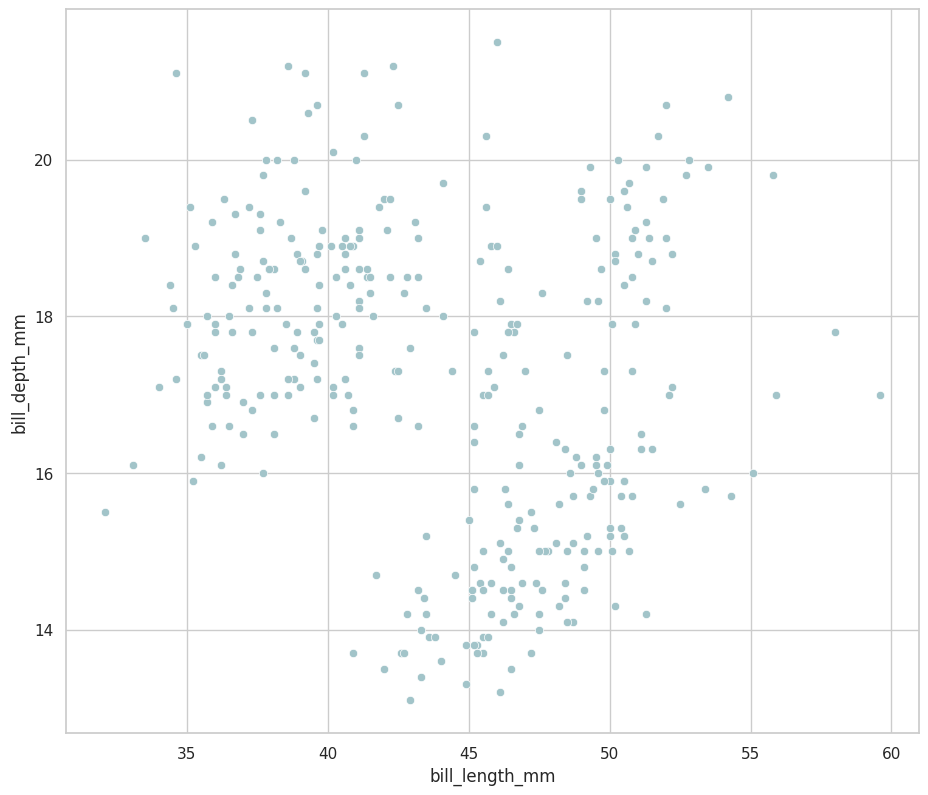

In [35]:
sns.scatterplot(
    data = datos_procesados,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    color = '#A2C4C9'
);

El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


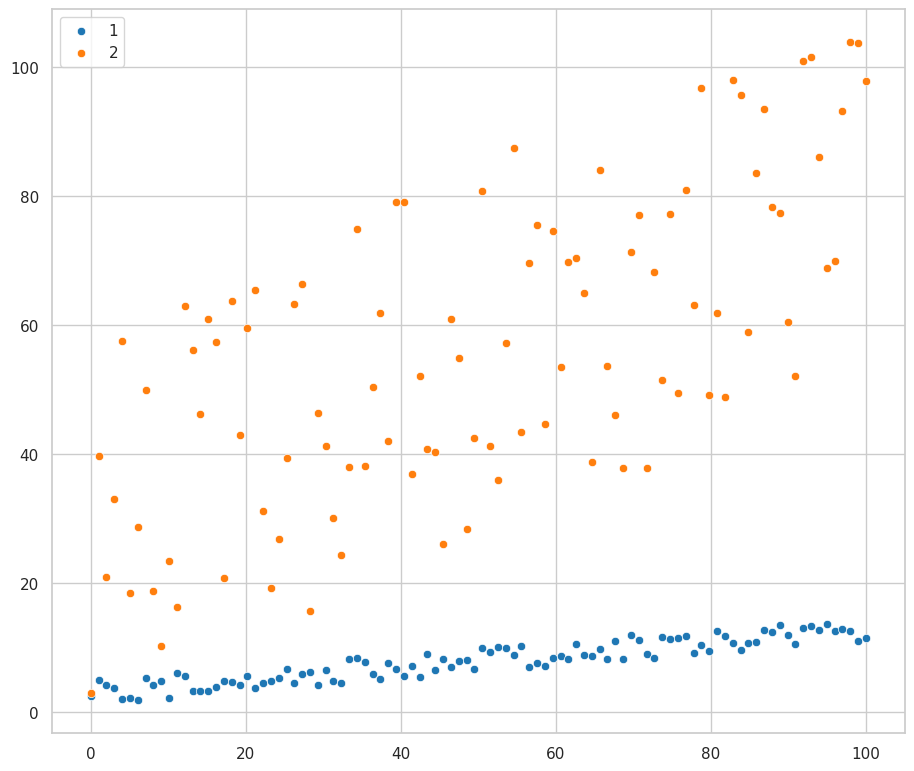

In [36]:
np.random.seed(42)

x1 = np.linspace(0, 100, 100)
y1 = 0.1* x1 +3 + np.random.uniform(-2, 2, size=x1.size)

sns.scatterplot(x=x1, y=y1)

x2 = np.linspace(0, 100, 100)
y2 = 0.5* x1 +1 + np.random.uniform(0, 60, size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(['1', '2'])

print(np.corrcoef(x1, y1))
print(np.corrcoef(x2, y2))

## Establecer relaciones: Análisis de regresión simple

Permite medir la fuerza del efecto en los datos mediante el ajuste de una linea recta. Es mucho más efectivo para interpretar el comportamiento de los datos.

In [37]:
# Regresión  lineal con Scipy
res_1 = scipy.stats.linregress(x=x1, y=y1)
res_2 = scipy.stats.linregress(x=x2, y=y2)

print(res_1, res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


Esto arroja como resultado parámetros, como el slope, que indica la pendiente de la recta (A mayor slope, mayor el efecto de la variable x sobre la variable y); el intercep, que indica el punto donde la linea corta el eje ‘y’; y el rvalue, que indica la proporción de datos capturados para una mejor descripcion de los datos.

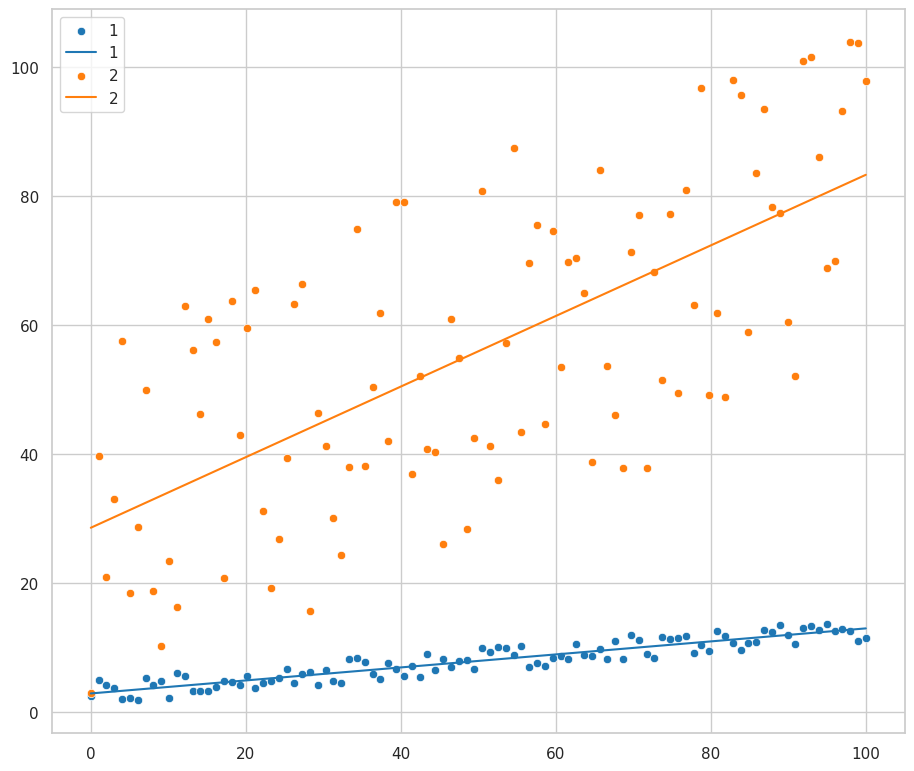

In [38]:
# Ejemplo donde se realiza de manera manual la regresión líneal con scipy
sns.scatterplot(x=x1, y=y1)

fx1 = np.array([x1.min(), x1.max()])
fy1 = res_1.intercept + res_1.slope * fx1

plt.plot(fx1, fy1)

sns.scatterplot(x=x2, y=y2)

fx2 = np.array([x2.min(), x2.max()])
fy2 = res_2.intercept + res_2.slope * fx2

plt.plot(fx2, fy2)
plt.legend(['1', '1', '2', '2']);

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


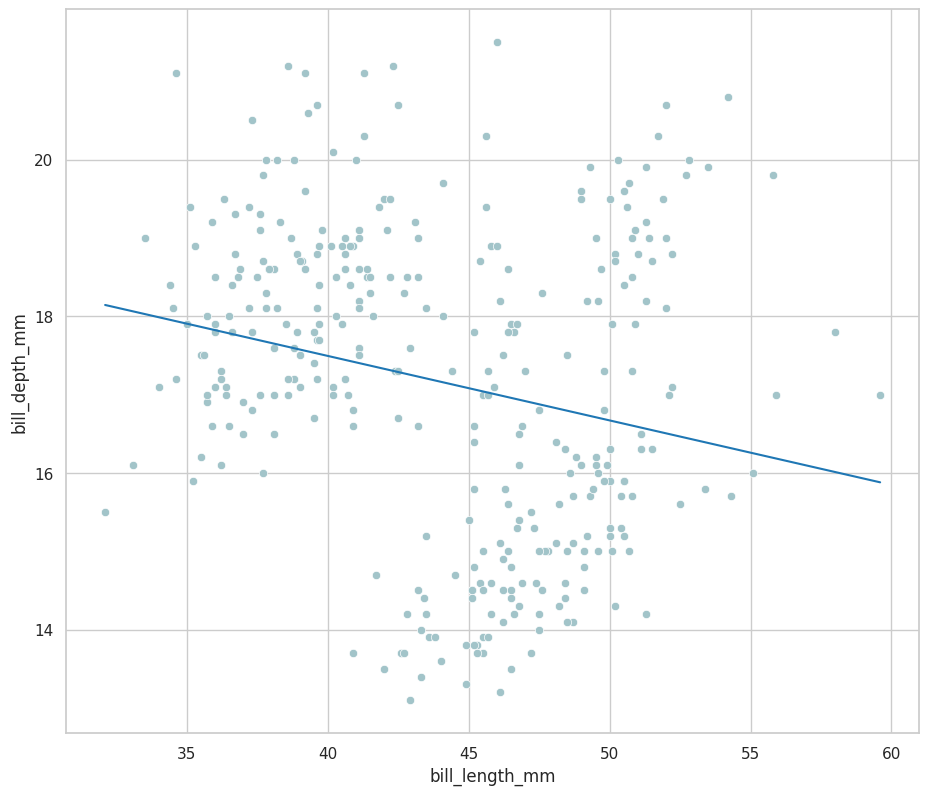

In [39]:
# Gráfico de la longitud en funcion del ancho del pico

sns.scatterplot(
    data = datos_procesados,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    color = '#A2C4C9'
)

# Calcular la regresion lineal
res_penguins = scipy.stats.linregress(x=datos_procesados.bill_length_mm, y=datos_procesados.bill_depth_mm)
print(res_penguins)

# Gráficar línea utilizando los parametros dados por la regresión
fx1 = np.array([datos_procesados.bill_length_mm.min(), datos_procesados.bill_length_mm.max()])
fy1 = res_penguins.intercept + res_penguins.slope * fx1
plt.plot(fx1, fy1);

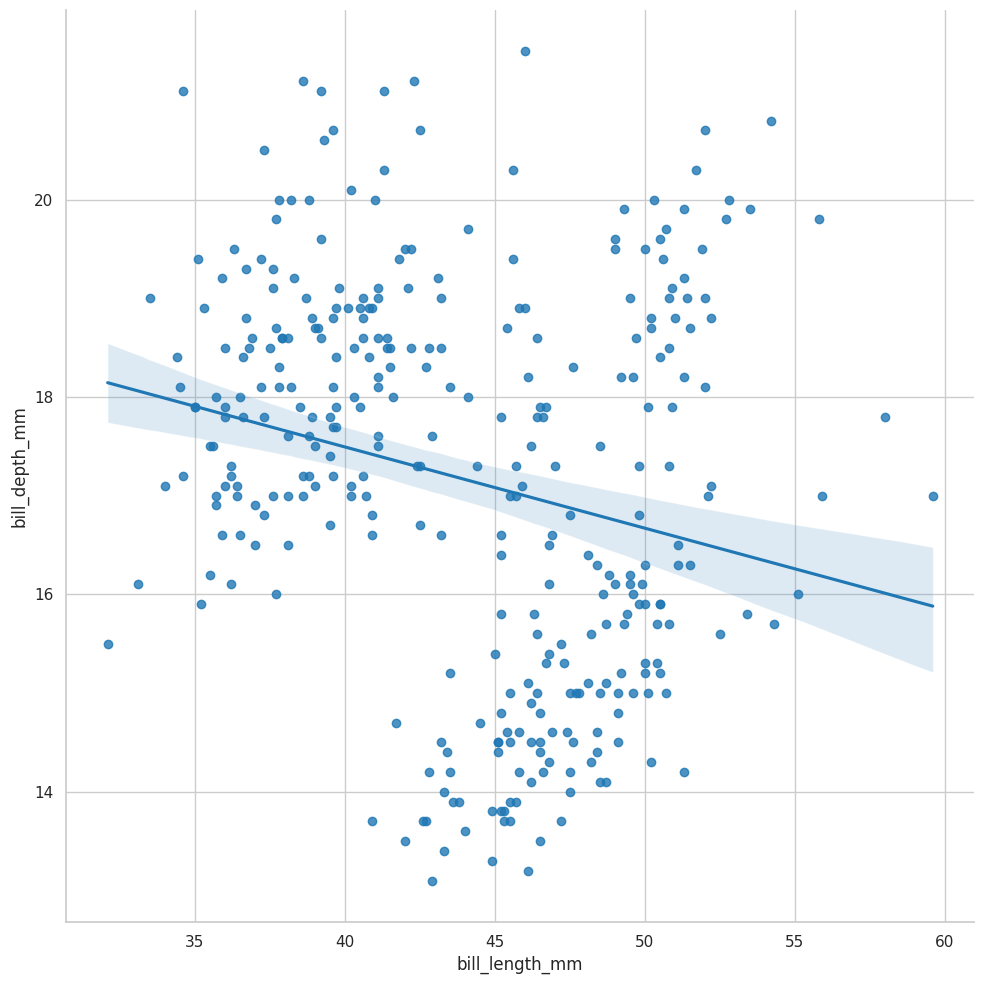

In [41]:
# Regresión lineal con Seaborn:
# No da detallles sobre los datos estadísticos como scipy
# Genera una zona de tendencia donde los datos de un modelo tienen mayor probabilidad de caer
sns.lmplot(
    data = datos_procesados,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    height = 10,
);

## Limitaciones del análisis de regresión simple

+ La regresion lineal simple de A - B no es lo mismo que B - A. Las regresiones pueden ser diferentes en cada caso. Se debe elegir de correctamente cual sera la variable independiente y dependiente.
+ Si dos variables crecen o decrecen siguiendo las mismas pautas, no implica necesariamente que una cause la otra. Correlacion no implica causalidad.
+ Solo puede manejar relaciones lineales. Es importante visualizar los datos para poder determinar qué tipo de regresión utilizar.

### La regresión lineal simple no es simétrica

In [42]:
x = datos_procesados.bill_length_mm
y = datos_procesados.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


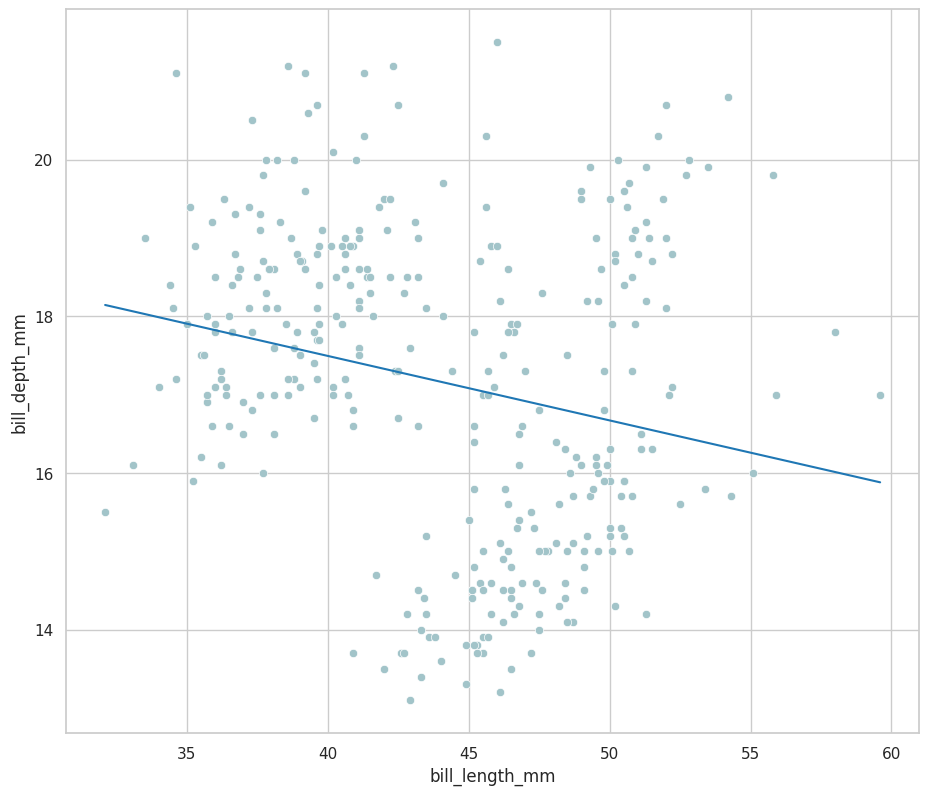

In [44]:
# Regresión lineal de x en funcion de y
sns.scatterplot(
    x = x,
    y = y,
    color = '#A2C4C9'
)

fx_1 = np.array([x.min(), x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1);

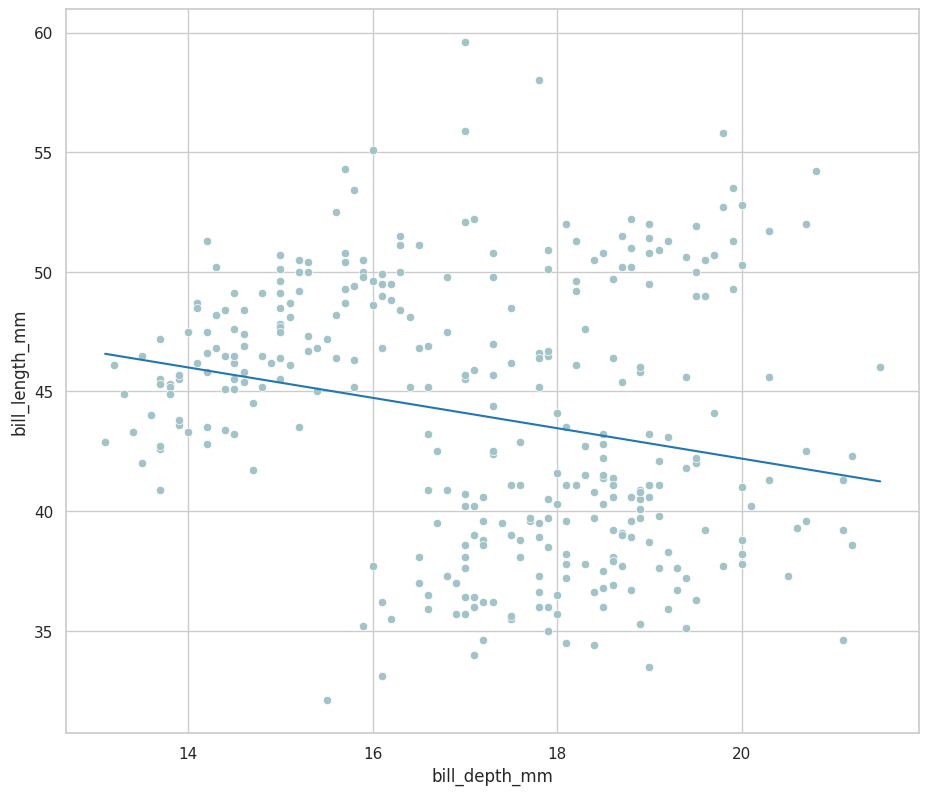

In [46]:
# Regresión lineal de y en funcion de x
sns.scatterplot(
    x = y,
    y = x,
    color = '#A2C4C9'
)

fx_2 = np.array([y.min(), y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2);

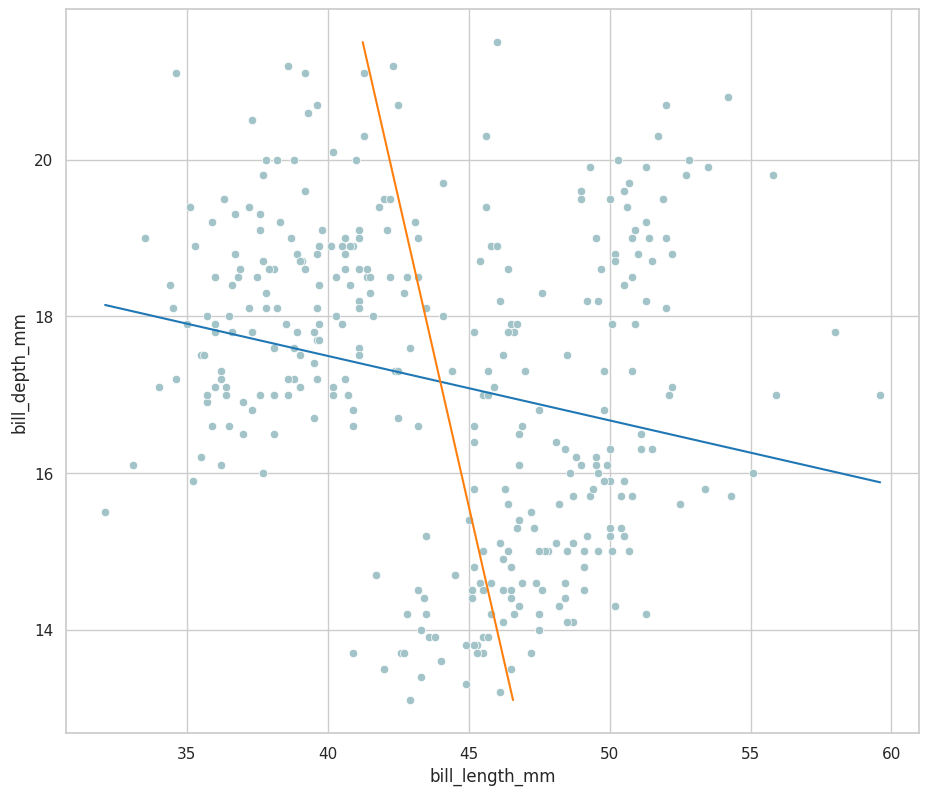

In [47]:
sns.scatterplot(
    x = x,
    y = y,
    color = '#A2C4C9'
)

plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2);

### La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [48]:
(
    smf.ols(
        formula = 'bill_length_mm ~ bill_depth_mm',
        data = datos_procesados
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

Esto significa que por cada unidad de cambio en la profundidad del pico se estaría esperando un -0.634905 mm en la longitud del pico.

In [49]:
# Ahora al revés
(
    smf.ols(
        formula = 'bill_depth_mm  ~ bill_length_mm',
        data = datos_procesados
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

***

## Ir al cuaderno de <a href='./3-multivariate-analysis.ipynb'>análisis multivariado</a> para continuar.